# Trumpfselektion with Deep NN Baseline

Based on script by Thomas Koller 01.10.19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
import itertools
datafile = 'data/jass/rnd_01.csv'
col_names = [a+str(b) for (a,b) in itertools.product([farbe for farbe in 'HKSE'], [bild for bild in range(9)])]+["Geschoben", "Player", "Aktion"]
data = pd.read_csv(datafile, header=None, names=col_names)
data

,H0,H1,H2,H3,H4,H5,H6,H7,H8,K0,...,E2,E3,E4,E5,E6,E7,E8,Geschoben,Player,Aktion
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,1631,2
1,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,64310,6
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,16721,1
3,1,0,0,0,1,0,0,0,1,1,...,0,0,1,0,1,0,0,1,0,4
4,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,72620,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161689,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,1,0,0,1,55942,3
161690,0,0,1,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,6
161691,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,3
161692,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,60659,6


## Binary Classification on targets 0 and 1

In [3]:
# select subset of data
target_classes = [0,1]
num_classes = len(target_classes)
zeroone = data[data['Aktion'].isin(target_classes)]
zeroone = zeroone.drop(columns='Player')
X = zeroone.loc[:,'H0':'Geschoben'].values.astype(np.float32)
y = zeroone.loc[:,'Aktion']

# make sure targets are binary (required by GPC implementation of sklearn)
y = y.isin(target_classes[0:1]) # first class = 1, second = 0
y = y.values
y = keras.utils.to_categorical(y, num_classes=num_classes)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=500, test_size=10000, random_state=23)
print('Train: %i, Test: %i' % (len(y_train), len(y_test)))

Train: 500, Test: 10000


In [5]:
nr_epochs = 60
batch_size = 64
model = keras.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs=nr_epochs, batch_size=batch_size,
              shuffle=True)

Train on 500 samples, validate on 10000 samples
Epoch 1/60
500/500 [==============================] - 2s 3ms/sample - loss: 0.7318 - accuracy: 0.4840 - val_loss: 0.7217 - val_accuracy: 0.4936
Epoch 2/60
500/500 [==============================] - 0s 690us/sample - loss: 0.7161 - accuracy: 0.5020 - val_loss: 0.7099 - val_accuracy: 0.5121
Epoch 3/60
500/500 [==============================] - 0s 927us/sample - loss: 0.7022 - accuracy: 0.5140 - val_loss: 0.6993 - val_accuracy: 0.5320
Epoch 4/60
500/500 [==============================] - 0s 574us/sample - loss: 0.6906 - accuracy: 0.5360 - val_loss: 0.6892 - val_accuracy: 0.5484
Epoch 5/60
500/500 [==============================] - 0s 605us/sample - loss: 0.6796 - accuracy: 0.5640 - val_loss: 0.6800 - val_accuracy: 0.5658
Epoch 6/60
500/500 [==============================] - 0s 597us/sample - loss: 0.6692 - accuracy: 0.5840 - val_loss: 0.6710 - val_accuracy: 0.5832
Epoch 7/60
500/500 [==============================] - 0s 660us/sample - loss: 

Accuracy: 
  train 0.968
  val   0.945


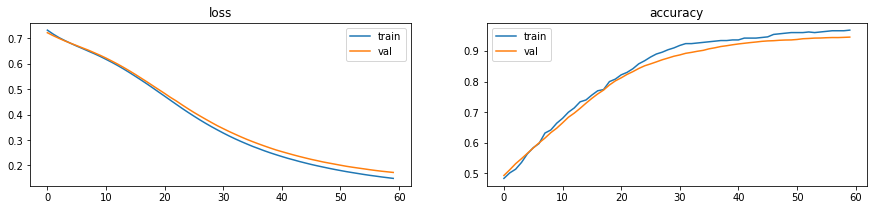

In [6]:
print('Accuracy: \n  train %.3f\n  val   %.3f' % (hist.history['accuracy'][-1], hist.history['val_accuracy'][-1]))
fig, ax = plt.subplots(1,2, figsize=(15,3))
ax[0].plot(hist.history['loss'], label='train')
ax[0].plot(hist.history['val_loss'], label='val')
ax[0].set_title('loss')
ax[0].legend()
ax[1].plot(hist.history['accuracy'], label='train')
ax[1].plot(hist.history['val_accuracy'], label='val')
ax[1].set_title('accuracy')
ax[1].legend(); None

### Increasing training set size: 1000

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=1000,test_size=10000, random_state=23)
print('Train: %i, Test: %i' % (len(y_train), len(y_test)))

Train: 1000, Test: 10000


In [8]:
nr_epochs = 60
batch_size = 64
model = keras.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs=nr_epochs, batch_size=batch_size,
              shuffle=True)

Train on 1000 samples, validate on 10000 samples
Epoch 1/60
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.6897 - accuracy: 0.5500 - val_loss: 0.6791 - val_accuracy: 0.5755
Epoch 2/60
1000/1000 [==============================] - 0s 453us/sample - loss: 0.6625 - accuracy: 0.5900 - val_loss: 0.6528 - val_accuracy: 0.6125
Epoch 3/60
1000/1000 [==============================] - 0s 491us/sample - loss: 0.6370 - accuracy: 0.6330 - val_loss: 0.6271 - val_accuracy: 0.6510
Epoch 4/60
1000/1000 [==============================] - 0s 493us/sample - loss: 0.6106 - accuracy: 0.6640 - val_loss: 0.5996 - val_accuracy: 0.6887
Epoch 5/60
1000/1000 [==============================] - 0s 384us/sample - loss: 0.5823 - accuracy: 0.7110 - val_loss: 0.5709 - val_accuracy: 0.7251
Epoch 6/60
1000/1000 [==============================] - 0s 454us/sample - loss: 0.5524 - accuracy: 0.7540 - val_loss: 0.5404 - val_accuracy: 0.7578
Epoch 7/60
1000/1000 [==============================] - 1s 532us/

Accuracy: 
  train 0.970
  val   0.958


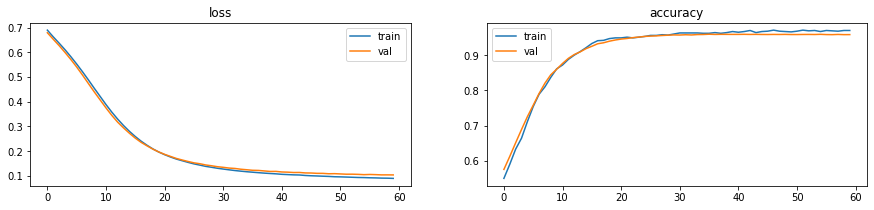

In [9]:
print('Accuracy: \n  train %.3f\n  val   %.3f' % (hist.history['accuracy'][-1], hist.history['val_accuracy'][-1]))
fig, ax = plt.subplots(1,2, figsize=(15,3))
ax[0].plot(hist.history['loss'], label='train')
ax[0].plot(hist.history['val_loss'], label='val')
ax[0].set_title('loss')
ax[0].legend()
ax[1].plot(hist.history['accuracy'], label='train')
ax[1].plot(hist.history['val_accuracy'], label='val')
ax[1].set_title('accuracy')
ax[1].legend(); None

### Increasing training set size: 10'000

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=10000,test_size=10000, random_state=23)
print('Train: %i, Test: %i' % (len(y_train), len(y_test)))

Train: 10000, Test: 10000


In [13]:
nr_epochs = 60
batch_size = 64
model = keras.Sequential()
model.add(keras.layers.Dense(8, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
              epochs=nr_epochs, batch_size=batch_size,
              shuffle=True)

Train on 10000 samples, validate on 10000 samples
Epoch 1/60
10000/10000 [==============================] - 1s 76us/sample - loss: 0.5997 - accuracy: 0.6785 - val_loss: 0.4379 - val_accuracy: 0.8387
Epoch 2/60
10000/10000 [==============================] - 0s 35us/sample - loss: 0.3034 - accuracy: 0.9084 - val_loss: 0.2115 - val_accuracy: 0.9452
Epoch 3/60
10000/10000 [==============================] - 0s 34us/sample - loss: 0.1705 - accuracy: 0.9560 - val_loss: 0.1444 - val_accuracy: 0.9582
Epoch 4/60
10000/10000 [==============================] - 0s 34us/sample - loss: 0.1291 - accuracy: 0.9645 - val_loss: 0.1210 - val_accuracy: 0.9594
Epoch 5/60
10000/10000 [==============================] - 0s 33us/sample - loss: 0.1119 - accuracy: 0.9661 - val_loss: 0.1086 - val_accuracy: 0.9645
Epoch 6/60
10000/10000 [==============================] - 0s 34us/sample - loss: 0.1033 - accuracy: 0.9659 - val_loss: 0.1029 - val_accuracy: 0.9634
Epoch 7/60
10000/10000 [==============================] 

Accuracy: 
  train 0.969
  val   0.962


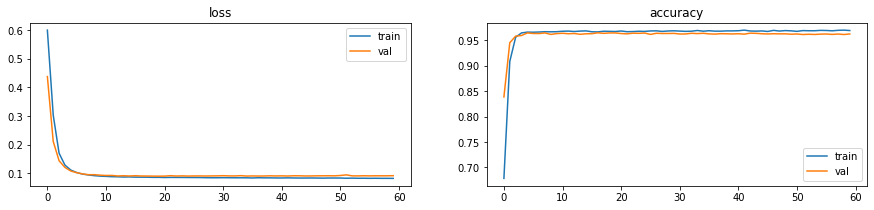

In [14]:
print('Accuracy: \n  train %.3f\n  val   %.3f' % (hist.history['accuracy'][-1], hist.history['val_accuracy'][-1]))
fig, ax = plt.subplots(1,2, figsize=(15,3))
ax[0].plot(hist.history['loss'], label='train')
ax[0].plot(hist.history['val_loss'], label='val')
ax[0].set_title('loss')
ax[0].legend()
ax[1].plot(hist.history['accuracy'], label='train')
ax[1].plot(hist.history['val_accuracy'], label='val')
ax[1].set_title('accuracy')
ax[1].legend(); None